# 1.Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('data.csv')

# Check for missing values
print(data.isnull().sum())

# No missing values found, so we can proceed

# Encode categorical variables (target in this case)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['target'] = le.fit_transform(data['target'])

# Split features and target
X = data.drop('target', axis=1)
y = data['target']

# Scale/normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

feature1    0
feature2    0
feature3    0
feature4    0
target      0
dtype: int64


# 2.Exploratory Data Analysis (EDA):

         feature1    feature2    feature3    feature4      target
count  149.000000  149.000000  149.000000  149.000000  149.000000
mean     5.850336    3.055034    3.770470    1.205369    1.006711
std      0.826391    0.436422    1.764611    0.761292    0.817847
min      4.300000    2.000000    1.000000    0.100000    0.000000
25%      5.100000    2.800000    1.600000    0.300000    0.000000
50%      5.800000    3.000000    4.400000    1.300000    1.000000
75%      6.400000    3.300000    5.100000    1.800000    2.000000
max      7.900000    4.400000    6.900000    2.500000    2.000000


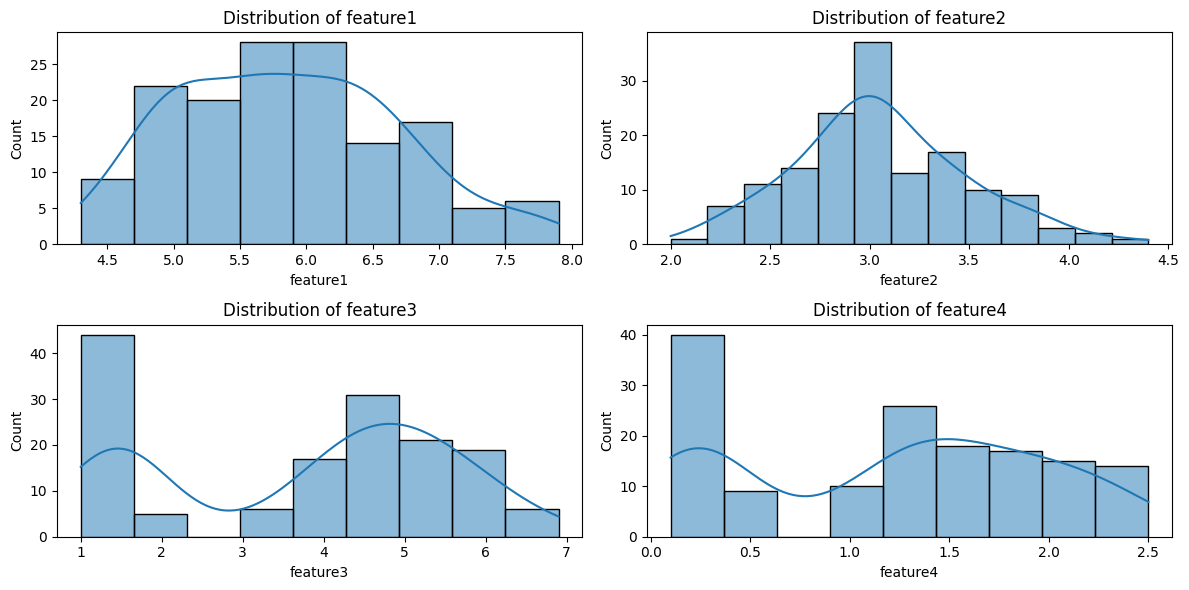

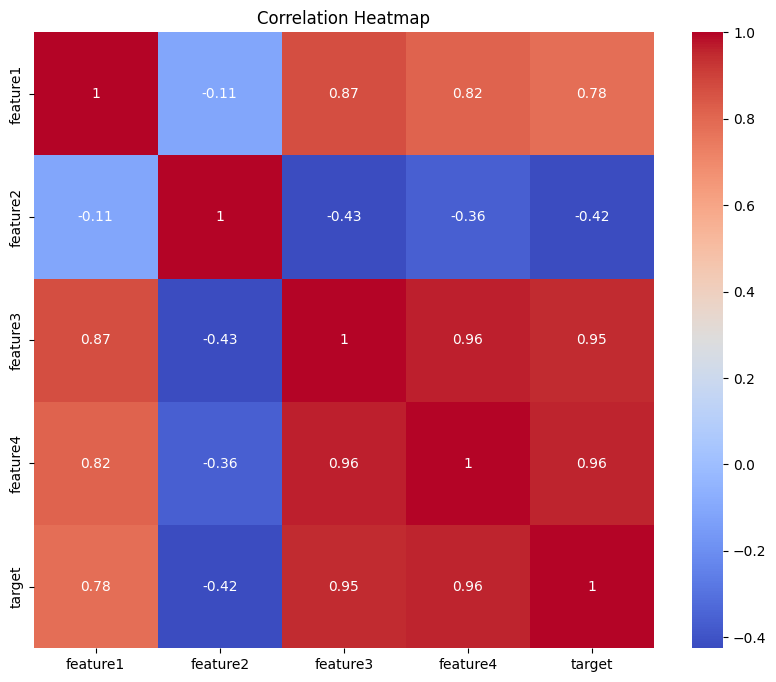

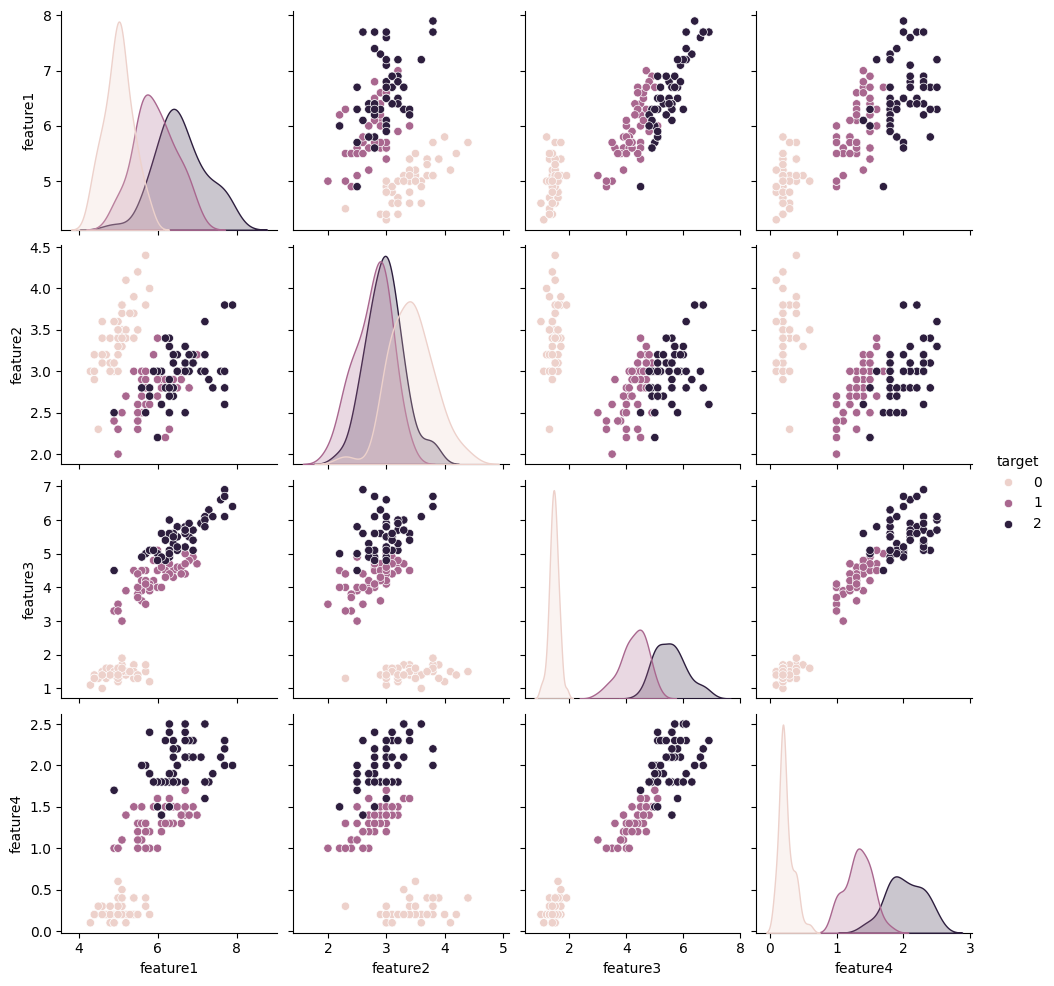

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical summary
print(data.describe())

# Visualize data distribution
plt.figure(figsize=(12, 6))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.histplot(data[f'feature{i+1}'], kde=True)
    plt.title(f'Distribution of feature{i+1}')
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot
sns.pairplot(data, hue='target')
plt.show()

# 3.Classification:

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

# Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print("Logistic Regression:")
print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("Decision Tree:")
print(confusion_matrix(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest:")
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

# Cross-validation
for model in [lr, dt, rf]:
    scores = cross_val_score(model, X_scaled, y, cv=5)
    print(f"{model.__class__.__name__} CV Scores: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")

Logistic Regression:
[[10  0  0]
 [ 0  6  3]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.67      0.80         9
           2       0.79      1.00      0.88        11

    accuracy                           0.90        30
   macro avg       0.93      0.89      0.89        30
weighted avg       0.92      0.90      0.90        30

Decision Tree:
[[10  0  0]
 [ 0  6  3]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.67      0.80         9
           2       0.79      1.00      0.88        11

    accuracy                           0.90        30
   macro avg       0.93      0.89      0.89        30
weighted avg       0.92      0.90      0.90        30

Random Forest:
[[10  0  0]
 [ 0  6  3]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.

# 4.Regression:

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

# For regression, we'll use feature4 as the target variable
X_reg = data[['feature1', 'feature2', 'feature3']]
y_reg = data['feature4']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Linear Regression
lr_reg = LinearRegression()
lr_reg.fit(X_train_reg, y_train_reg)
lr_pred_reg = lr_reg.predict(X_test_reg)
print("Linear Regression:")
print(f"R-squared: {r2_score(y_test_reg, lr_pred_reg):.3f}")
print(f"MSE: {mean_squared_error(y_test_reg, lr_pred_reg):.3f}")

# Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train_reg, y_train_reg)
dt_pred_reg = dt_reg.predict(X_test_reg)
print("Decision Tree Regressor:")
print(f"R-squared: {r2_score(y_test_reg, dt_pred_reg):.3f}")
print(f"MSE: {mean_squared_error(y_test_reg, dt_pred_reg):.3f}")

# Cross-validation for regression
for model in [lr_reg, dt_reg]:
    scores = cross_val_score(model, X_reg, y_reg, cv=5, scoring='r2')
    print(f"{model.__class__.__name__} CV R2 Scores: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")

Linear Regression:
R-squared: 0.933
MSE: 0.045
Decision Tree Regressor:
R-squared: 0.854
MSE: 0.096
LinearRegression CV R2 Scores: 0.410 (+/- 0.824)
DecisionTreeRegressor CV R2 Scores: -0.425 (+/- 2.766)


# 5.Confusion Matrix:

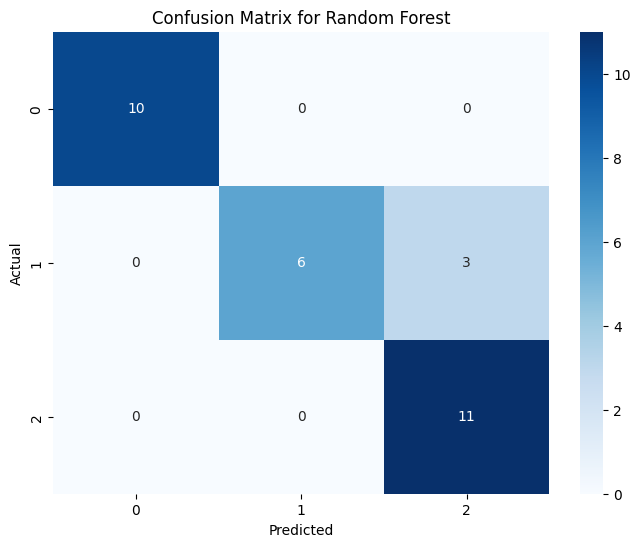

Accuracy: 0.900
Precision: 0.921
Recall: 0.900
F1 Score: 0.896


In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# We'll use Random Forest results for this example
cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Compute metrics
accuracy = accuracy_score(y_test, rf_pred)
precision = precision_score(y_test, rf_pred, average='weighted')
recall = recall_score(y_test, rf_pred, average='weighted')
f1 = f1_score(y_test, rf_pred, average='weighted')

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

# 6.Cross-Validation:

In [6]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# Define the number of folds
k = 5

# Initialize KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Classification models
classification_models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

print("Classification Models - K-Fold Cross-Validation Results:")
for name, model in classification_models.items():
    scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy')
    print(f"{name}:")
    print(f"  Mean accuracy: {scores.mean():.3f}")
    print(f"  Standard deviation: {scores.std():.3f}")
    print()

# Regression models
regression_models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42)
}

print("Regression Models - K-Fold Cross-Validation Results:")
for name, model in regression_models.items():
    r2_scores = cross_val_score(model, X_reg, y_reg, cv=kf, scoring='r2')
    mse_scores = -cross_val_score(model, X_reg, y_reg, cv=kf, scoring='neg_mean_squared_error')

    print(f"{name}:")
    print(f"  Mean R-squared: {r2_scores.mean():.3f}")
    print(f"  R-squared Standard deviation: {r2_scores.std():.3f}")
    print(f"  Mean MSE: {mse_scores.mean():.3f}")
    print(f"  MSE Standard deviation: {mse_scores.std():.3f}")
    print()

Classification Models - K-Fold Cross-Validation Results:
Logistic Regression:
  Mean accuracy: 0.953
  Standard deviation: 0.040

Decision Tree:
  Mean accuracy: 0.940
  Standard deviation: 0.025

Random Forest:
  Mean accuracy: 0.946
  Standard deviation: 0.034

Regression Models - K-Fold Cross-Validation Results:
Linear Regression:
  Mean R-squared: 0.929
  R-squared Standard deviation: 0.019
  Mean MSE: 0.040
  MSE Standard deviation: 0.010

Decision Tree Regressor:
  Mean R-squared: 0.879
  R-squared Standard deviation: 0.023
  Mean MSE: 0.069
  MSE Standard deviation: 0.018

